In [49]:
#importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
train = pd.read_csv("F:/A.V compitition/big-mart-sales-prediction/big-mart-sales-prediction/Train.csv")
test = pd.read_csv("F:/A.V compitition/big-mart-sales-prediction/big-mart-sales-prediction/Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
data = train.copy()

In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#Lowering the down column names
data.columns = data.columns.str.lower()

In [7]:
# TO FIND WHICH COLUMN CONTAIN NAN VALUES

data.isna().any()[lambda x:x]    

item_weight    True
outlet_size    True
dtype: bool

In [8]:
#Calculating Missing Values
(data.isnull().sum()/len(data))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

In [9]:
group_mean_weight = data.pivot_table(index = ['item_type'], values = 'item_weight', aggfunc =[np.mean])
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [10]:
mean_weight = group_mean_weight.iloc[:,[0][0]]
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [11]:
# Function to impute Missing Value in item_weight column:

def missing_value(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277
        elif item_type == "Breads":
            return 11.347
        elif item_type == "Breakfast":
            return 12.768
        elif item_type == "Canned":
            return 12.30
        elif item_type == "Dairy":
            return 13.42
        elif item_type == "Frozen Foods":
            return  12.867061
        elif item_type == "Fruits and Vegetables":
            return 13.224769
        elif item_type == "Hard Drinks":
            return 11.400328
        elif item_type == "Health and Hygiene":
            return 13.142314
        elif item_type == "Household":
             return 13.384736
        elif item_type == "Meat":
            return 12.817344
        elif item_type == "Others":
            return 13.853285
        elif item_type == "Seafood":
            return 12.552843
        elif item_type == "Snack Foods":
            return 12.987880
        elif item_type == "Soft Drinks":
            return 11.847460
        elif item_type == "Starchy Foods":
            return 13.690731
    return item_weight   

In [12]:
#Imputing the missing value by using defined function
data["item_weight"] = data[["item_type","item_weight"]].apply(missing_value, axis = 1)

In [13]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# DATA UNDERSTANDING THROUGH VISUALIZATION


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

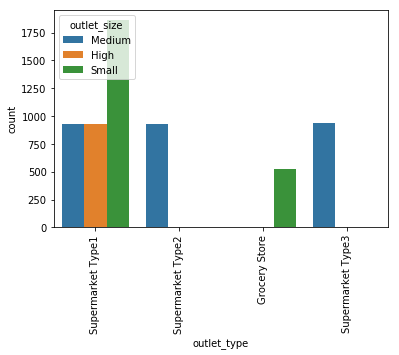

In [14]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = data, x = "outlet_type", hue = "outlet_size")
plt.xticks(rotation =90)


In [15]:
# Function for Imputing Missing value in Outlet_Size column:

def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    

In [16]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
data["outlet_size"] = data[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)


In [17]:
data['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
data["item_fat_content"] = data["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()


In [19]:
data['item_fat_content'].unique()

array(['low fat', 'regular'], dtype=object)

In [20]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


While exploring the "item_visibility" column, We Found many items visibility as 0.0 which is impossible. Hence, imputing these 0.0 values with MEAN of respective item of visibility.

In [24]:
mean_visibility = data.pivot_table(index = "item_identifier",  values = "item_visibility")

In [30]:
data.loc[(data["item_visibility"] == 0.0), "item_visibility"] = data.loc[(data["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])


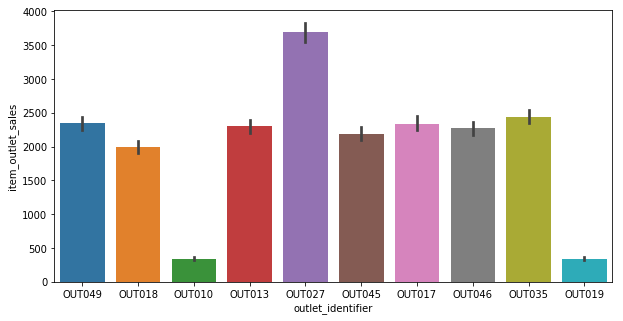

In [31]:
#understanding outlet_identifier depending on item_outlet_sales
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "outlet_identifier", y= "item_outlet_sales")

Text(0, 0.5, 'Mean of Item outlet sales')

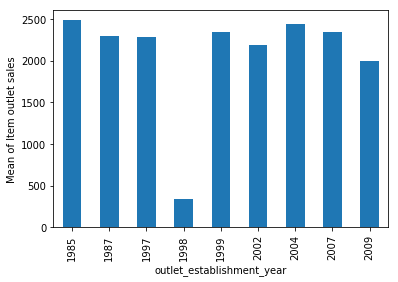

In [33]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
data.groupby("outlet_establishment_year")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

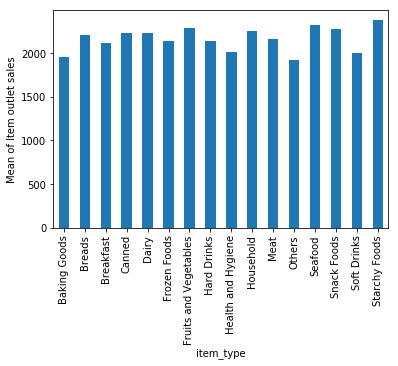

In [37]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
data.groupby("item_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

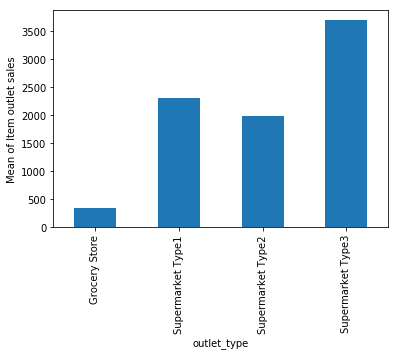

In [38]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
data.groupby("outlet_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

# Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count

In [39]:
cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']

In [40]:
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = data[i].value_counts().to_dict()
    data[i] = data[i].map(x)

In [41]:
#RESULTING DATASET AFTER CATEGORICAL VALUES CONVERTED TO NUMERICAL COLUMN
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.0160473,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.0192782,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.0167601,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.0152737,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.00808215,910,53.8614,932,932,932,3350,5577,994.7052


In [42]:
#COPYING DATA 
new_data= data.copy()

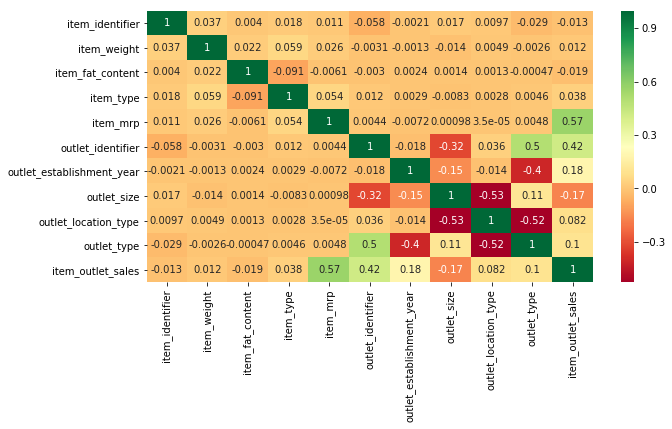

In [43]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)

In [44]:
#REMOVING LESS CORRELATED COLUMNS 
new_data =new_data.drop(["item_weight","item_identifier", "item_type", 
                         "item_fat_content","outlet_location_type"], axis = 1)

In [45]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,0.0160473,249.8092,930,930,2793,5577,3735.1380
1,0.0192782,48.2692,928,928,2793,928,443.4228
2,0.0167601,141.6180,930,930,2793,5577,2097.2700
3,0.0152737,182.0950,555,555,4798,1083,732.3800
4,0.00808215,53.8614,932,932,932,5577,994.7052


In [47]:
#CALCULATING THE SKEWNESS OF THE DATA
new_data.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

# Fitting Linear Regression Model

In [55]:
#Independent Variables:
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)

In [56]:
#Splitting The data  into Train and Test Dataset:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [57]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
#prediction
y_pred = regressor.predict(x_test)


In [59]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.5655871955087

In [60]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

1137.3590493888494

In [65]:
#residue 
residue_lr = y_test-y_pred

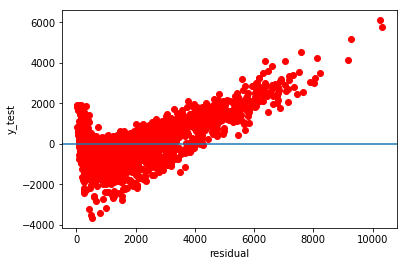

In [66]:
#Plotting Residual Plot
plt.scatter(y_test,residue_lr, c = "Red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

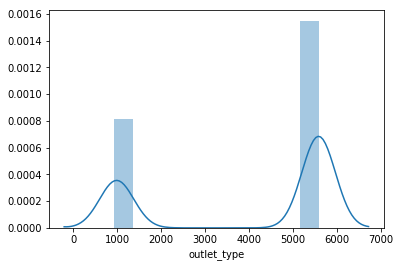

In [81]:
sns.distplot(new_data['outlet_type'])

ValueError: color kwarg must have one color per data set. 8523 data sets and 1 colors were provided

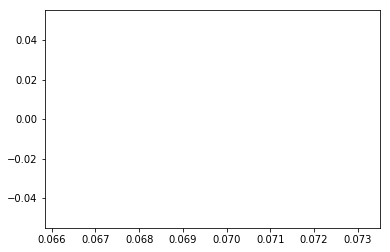

In [79]:
sns.distplot(new_data['item_visibility'])

In [82]:
new_data.dtypes

item_visibility               object
item_mrp                     float64
outlet_identifier              int64
outlet_establishment_year      int64
outlet_size                    int64
outlet_type                    int64
item_outlet_sales            float64
dtype: object